In [4]:
import sys
sys.path.append('..')
from network_rt_simulation import NetworkSimulator
from matplotlib import pyplot as plt
from scipy import stats
#from statsmodels.graphics.gofplots import qqplot_2samples 
import numpy as np
from plotting_utils import plot_rt_distribution

### Define the parameters for the DDM and neural circuit model, find the optimal $c_1$ that minimizes the error

In [3]:
# Load saved RT data
DDM_params = {
    'v': .5,
    'sig_W': .5,
    'boundary': .8,
    'dt':1.,
    'dt_DDM': 25.
}

CANN_params = {
    'dur1': 500,
    'dur2': 2000,
    'edge_type': 'tanh', 
    'num': 1024,
    'tau_bump': 0.08,
    'tau_edge': 4,
    'beta': 2,
    'offset': 3.85,
    'delta_z': 1/40,
    'J0_bump': 4,
    'J0_edge': 1,
    'a': 0.25,
    'A': 10,
    'c2': 1
}
CANN_params.update({'c1': 2.563})
c1_range = np.linspace(0.1, 4, 20)
#mon_vars = ['s_pos', 'clicks_left', 'clicks_right']
mon_vars = None
Simulator = NetworkSimulator(DDM_params, CANN_params, mon_vars=mon_vars, save_runner=False, c1_range=c1_range)
#c1_opt, err_per_c1 = Simulator.find_optimal_c1(c1_range)
#_, _ = Simulator.simulate_network(num_trials=1, batch_size=1)

Text(0.5, 1.0, 'Mean Error vs c1 with Error Bars')

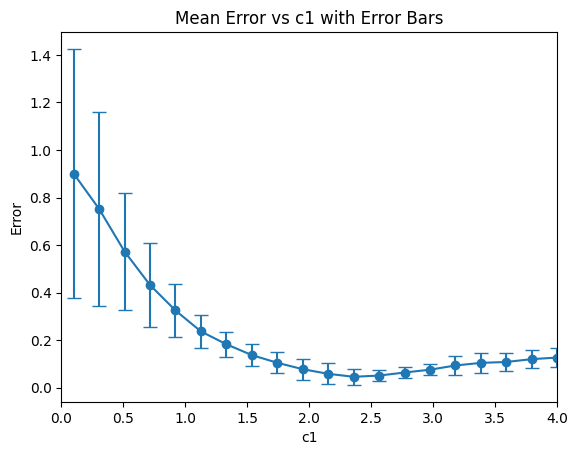

: 

In [ ]:
mean_err = np.mean(Simulator.err_per_c1, axis=1)
std_err = np.std(Simulator.err_per_c1, axis=1)
plt.figure()
plt.errorbar(c1_range, mean_err, yerr=std_err, fmt='o-', capsize=5)
plt.xlabel('c1')
plt.xlim([0,4])
plt.ylabel('Error')
plt.title('Mean Error vs c1 with Error Bars')

### Simulate 1000 trials

In [ ]:
### 
# num_trials = 100
# batch_size = 10
# RT_sim_corr, RT_sim_incorr = Simulator.simulate_network(num_trials=num_trials, batch_size=batch_size)


### to simulate more trials try "python run_simulation.py --num_trials 1000 --batch_size 100"

### plot RT distribution 

Discrete simulation parameters: step length dl = 0.08004, probability p = 0.57809


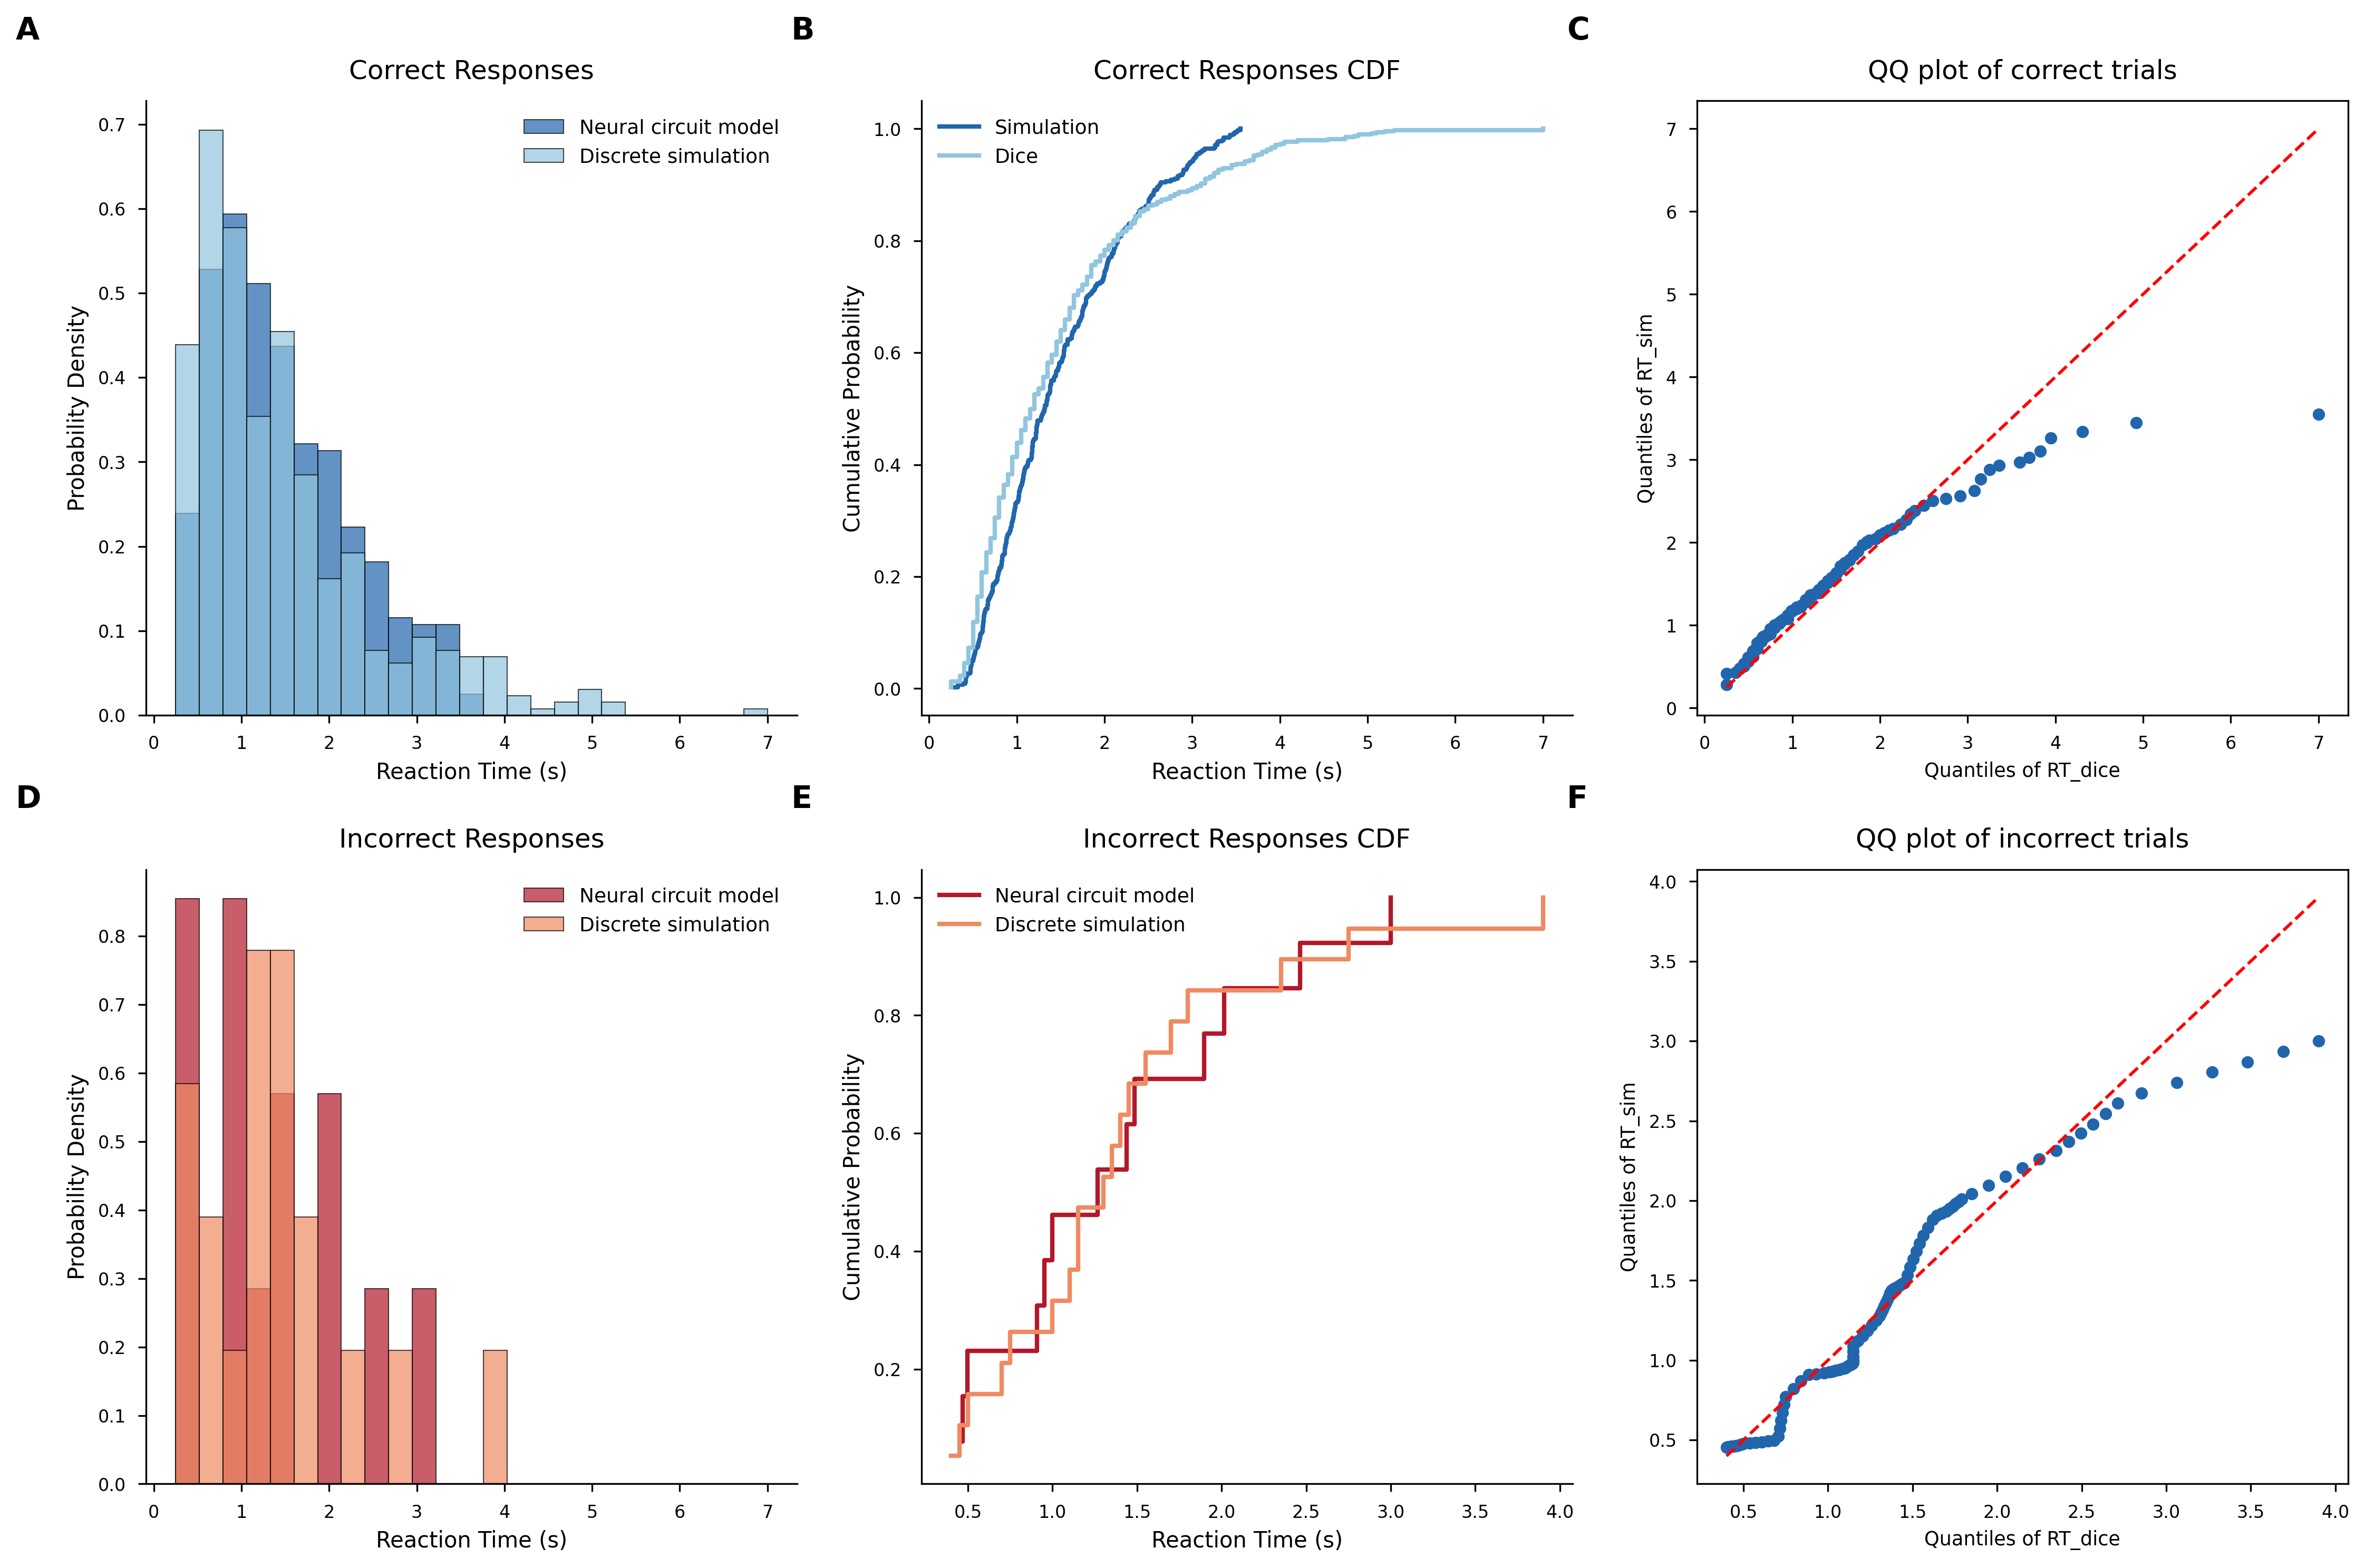

In [6]:

num_trials=500
RT_sim_corr = np.load('RT_corr.npy')
RT_sim_incorr = np.load('RT_incorr.npy')

# Run dice simulation with same parameters
RT_dice_corr, RT_dice_incorr = Simulator.generate_dice_RT(n_trials=num_trials)




# Plot RT distributions
plot_rt_distribution(
    RT_sim_corr, RT_sim_incorr,
    RT_dice_corr, RT_dice_incorr,
    show_plot=True
)

# # Create QQ plot with improved styling
# fig = plt.figure(figsize=(6, 6))
# ax = fig.add_subplot(111)

# # Plot correct RTs with publication-style formatting
# #stats.probplot(RT_corr, RT_incorr, plot=plt)
# qqplot_2samples(RT_corr, RT_incorr, line='45', ax=plt.gca()) # Modified line

# # Customize QQ plot appearance
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.set_title("Normal Q-Q Plot of Response Times", fontsize=12, pad=15)
# ax.set_xlabel("Theoretical Quantiles", fontsize=10)
# ax.set_ylabel("Sample Quantiles", fontsize=10)
# ax.tick_params(axis='both', which='major', labelsize=9)

# # Add grid for better readability
# ax.grid(True, linestyle='--', alpha=0.7)

# plt.tight_layout()
# plt.show()

In [ ]:



fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Positive RT
axs[0].plot(q_pos, q_corr, 'o')
axs[0].plot([min(q_pos.min(), q_corr.min()), max(q_pos.max(), q_corr.max())],
            [min(q_pos.min(), q_corr.min()), max(q_pos.max(), q_corr.max())],
            'r--')
axs[0].set_title("correct trials")
#axs[0].set_xlabel("Quantiles of pos_RT_sim")
#axs[0].set_ylabel("Quantiles of RT_corr (s)")
axs[0].grid(True)

# Negative RT
axs[1].plot(q_neg, q_corr, 'o')
axs[1].plot([min(q_neg.min(), q_corr.min()), max(q_neg.max(), q_corr.max())],
            [min(q_neg.min(), q_corr.min()), max(q_neg.max(), q_corr.max())],
            'r--')
axs[1].set_title("Incorrect Trials")
#axs[1].set_xlabel("Quantiles of neg_RT_sim")
axs[1].grid(True)

plt.tight_layout()
plt.show()